# Dataset 1: Credit Card Fraud Detection
Obtained from the UCI Machine Learning Repository

## Setup and imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

## Load and preview the dataset

In [101]:
names = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irrad', 'Class']

df = pd.read_csv('breast-cancer.csv', names=names, skipinitialspace=True, na_values='?')
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irrad,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


## Preprocessing

In [102]:
df.nunique()

age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       2
deg-malig       3
breast          2
breast-quad     5
irrad           2
Class           2
dtype: int64

In [103]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irrad          0
Class          0
dtype: int64

## Check the relative balance of classes

In [104]:
positive = df[df['Class'] == 'recurrence-events']
negative = df[df['Class'] == 'no-recurrence-events']

print(positive.shape, negative.shape)

(85, 10) (201, 10)


## Make classes the same shape

In [105]:
negative = negative.sample(positive.shape[0])
print(positive.shape, negative.shape)

(85, 10) (85, 10)


In [106]:
df = df[0:0]
df = df.append(negative, ignore_index=True)
df = df.append(positive, ignore_index=True)

df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irrad,Class
0,50-59,premeno,35-39,0-2,no,2,right,left_up,no,no-recurrence-events
1,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
2,50-59,ge40,0-4,0-2,no,2,left,central,no,no-recurrence-events
3,50-59,premeno,25-29,0-2,no,1,left,left_low,no,no-recurrence-events
4,70-79,ge40,20-24,0-2,no,3,left,left_up,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
165,50-59,ge40,20-24,0-2,no,2,left,left_up,no,recurrence-events
166,40-49,premeno,20-24,3-5,yes,2,right,right_up,yes,recurrence-events
167,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events
168,50-59,ge40,25-29,6-8,no,3,left,left_low,yes,recurrence-events


## Impute missing values

In [107]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df[["node-caps"]] = imputer.fit_transform(df[["node-caps"]])
df[["breast-quad"]] = imputer.fit_transform(df[["breast-quad"]])

df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irrad          0
Class          0
dtype: int64

## Prepare data for training

### Split into features and targets

In [108]:
X = df.iloc[:, :-1].to_numpy()
X = X.astype(str)
y = df.iloc[:, -1].to_numpy()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

print (X_train.shape, X_test.shape)

(136, 9) (34, 9)


### Encode the features

In [109]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

### Label-Encode the targets

In [110]:
le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

# Transform targets to 2d array for neural network
y = y.reshape((len(y), 1))

## Create and train the neural network

In [150]:
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
results = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
14/14 [==============================] - 0s 6ms/step - loss: 0.7814 - accuracy: 0.3676 - val_loss: 0.7275 - val_accuracy: 0.4412
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.3897 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.7480 - accuracy: 0.4191 - val_loss: 0.7151 - val_accuracy: 0.5294
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.7336 - accuracy: 0.4632 - val_loss: 0.7098 - val_accuracy: 0.4706
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.4706 - val_loss: 0.7047 - val_accuracy: 0.4706
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.7090 - accuracy: 0.4926 - val_loss: 0.6990 - val_accuracy: 0.5000
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5147 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 8/20
14/14 [==

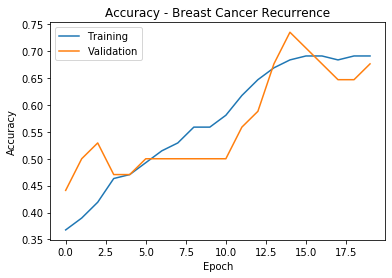

In [151]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Accuracy - Breast Cancer Recurrence')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'])
#plt.savefig('bcr_accuracy_01.png')
plt.show()